<a href="https://colab.research.google.com/github/satyajit741055/Deep_Learning_MY_Experiments/blob/main/MNIST_UNConvenet_SK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Author : Satyajit Khot 


import numpy as np 
import tensorflow as tf
import os
os.chdir("/content/drive/MyDrive/DataScienceBySk/Deep Learning /Satyajit /Deep Learning/CNN Model")

# Load MNIST data

11501568/11490434 [==============================] - 0s 0us/step


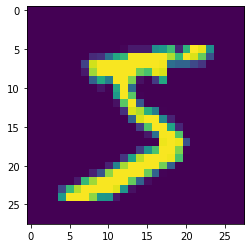

In [2]:
mnist = tf.keras.datasets.mnist
(X_train_full,y_train_full) , (X_test,Y_test) = mnist.load_data()

import matplotlib.pyplot as plt 
%matplotlib inline
plt.imshow(X_train_full[0])

In [3]:
#Preprocessing 

X_val, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
Y_val, Y_train = y_train_full[:5000] , y_train_full[5000:]

X_test = X_test/255.
Y_test = Y_test

#Reshaping the data 
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_val = X_val.reshape(X_val.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

# One Hot Encoding 
Y_train = tf.keras.utils.to_categorical(Y_train,10)
Y_val   = tf.keras.utils.to_categorical(Y_val,10)
Y_test  = tf.keras.utils.to_categorical(Y_test,10)



# Regular CNN Model

In [8]:
# CNN Model  
input_shape = (28,28,1)

model_1 = tf.keras.Sequential([
              tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape), #channel Dimension = 26*26*32
              tf.keras.layers.MaxPooling2D(pool_size=(2,2)) ,#channel Dimension = 13*13*32

              tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'), #channel Dimension = 11*11*64
              tf.keras.layers.BatchNormalization(), 
              tf.keras.layers.MaxPooling2D(pool_size=(2,2)) ,#channel Dimension = 5*5*64

              tf.keras.layers.Conv2D(filters=128,kernel_size=(5,5),activation='relu'), #channel Dimension = 1*1*128

              tf.keras.layers.Flatten(),

          
              tf.keras.layers.Dense(300,activation='relu'),
              tf.keras.layers.Dense(100,activation='relu'),
              tf.keras.layers.Dropout(0.1),

              tf.keras.layers.Dense(10,activation='softmax')


              
])

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                      

In [9]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

Early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

history_1 = model_1.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_val,Y_val),callbacks=[Early_stopping])

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1163 - accuracy: 0.9659 - val_loss: 0.0611 - val_accuracy: 0.9812
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0490 - accuracy: 0.9860 - val_loss: 0.0591 - val_accuracy: 0.9832
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0380 - accuracy: 0.9898 - val_loss: 0.0591 - val_accuracy: 0.9876
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.0528 - val_accuracy: 0.9888
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0255 - accuracy: 0.9927 - val_loss: 0.0604 - val_accuracy: 0.9848
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0235 - accuracy: 0.9935 - val_loss: 0.0529 - val_accuracy: 0.9902
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0180 - accuracy: 0.9954 - val_loss: 0.0632 - val_accuracy:

In [10]:
# evaluate test accuracy
score = model_1.evaluate(X_test, Y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.1300%


# Unconventional CNN Models 

In [4]:
model = tf.keras.Sequential([
                               
          tf.keras.layers.Conv2D(8,(3,3),activation='relu',input_shape=(28,28,1)), # channel_dim = 26*26*16
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(0.1),

          tf.keras.layers.Conv2D(12,(3,3)), #channel_dim = 24*24*32
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation('relu'),
          tf.keras.layers.Dropout(0.1),

          tf.keras.layers.Conv2D(16,(1,1),activation = 'relu'), #channel_dim = 24*24*32
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #channel_dim = 12*12*32

          tf.keras.layers.Conv2D(10,(3,3),activation = 'relu'), #channel_dim = 10*10*32
          
          tf.keras.layers.Dropout(0.1),

          tf.keras.layers.Conv2D(10,(3,3),activation = 'relu'), #channel_dim = 8*8*32
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(0.2),

          tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'), #channel_dim = 6*6*32
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(0.1),

          tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'), #channel_dim = 4*4*32
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(0.1),


          tf.keras.layers.Conv2D(10,(4,4),activation = 'relu'), #channel_dim = 1*1*32

          tf.keras.layers.Flatten(),

          tf.keras.layers.Activation('softmax')


])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 8)        32        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 12)        876       
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 12)       48        
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 24, 24, 12)        0

In [5]:

model.compile(loss='categorical_crossentropy', optimizer='Adam', 
              metrics=['accuracy'])


def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)


LR = tf.keras.callbacks.LearningRateScheduler(scheduler)
Early_stopping =  tf.keras.callbacks.EarlyStopping(patience=5)


history = model.fit(X_train,Y_train,batch_size=32,epochs=30,callbacks=[Early_stopping,LR],validation_data=(X_val,Y_val))

Epoch 1/30
1719/1719 [==============================] - 25s 7ms/step - loss: 0.3425 - accuracy: 0.8915 - val_loss: 0.1084 - val_accuracy: 0.9676 - lr: 0.0010
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1039 - accuracy: 0.9678 - val_loss: 0.0626 - val_accuracy: 0.9810 - lr: 0.0010
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0786 - accuracy: 0.9756 - val_loss: 0.0674 - val_accuracy: 0.9810 - lr: 0.0010
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0677 - accuracy: 0.9777 - val_loss: 0.0491 - val_accuracy: 0.9856 - lr: 0.0010
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0608 - accuracy: 0.9808 - val_loss: 0.0426 - val_accuracy: 0.9870 - lr: 0.0010
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0552 - accuracy: 0.9818 - val_loss: 0.0432 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 7/30
1719/1719 [==============================

In [7]:
# evaluate test accuracy
score = model.evaluate(X_test, Y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.3600%
